In [1]:
from builtins import range, input

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import norm
from scipy.stats import multivariate_normal as mvn

from collections import defaultdict

In [3]:

def get_data(limit=None):
    print("Reading in and transforming data...")
    df = pd.read_csv('../data/digit-recognizer/train.csv')
    data = df.values
    np.random.shuffle(data)
    X = data[:, 1:] / 255.0 # data is from 0..255
    Y = data[:, 0]
    if limit is not None:
        X, Y = X[:limit], Y[:limit]
    return X, Y

In [4]:
X, Y = get_data(10000)
Ntrain = len(Y) // 2
Xtrain, Ytrain = X[:Ntrain], Y[:Ntrain]
Xtest, Ytest = X[Ntrain:], Y[Ntrain:]


Reading in and transforming data...


In [5]:
X.shape
Y.shape

(10000, 784)

(10000,)

In [6]:
# We need the rows to be the Features, so either Transpose the X or make rowvar= False,
# so that it could Transpose internally
def getCovarianceMat(X, D, smoothing=1e-2):
    return np.cov(X.T) + np.eye(D)*smoothing

In [17]:
class Bayes():
    
    def __init__(self, unique_classes):
        
        self.labels=unique_classes
        
    def fit(self, X, Y, smoothing=1e-2):
        N, D = X.shape
        self.gaussians = np.array([defaultdict(float) for index in range(len(self.labels))])
        self.priors = dict()
        for c in self.labels:
            current_x = X[Y == c]
            self.gaussians[c] = {
                'mean': current_x.mean(axis=0),
                'var': getCovarianceMat(current_x, D, smoothing)
            }
            self.priors[c] = float(len(Y[Y == c])) / len(Y)

    def score(self, X, Y):
        P = self.predict(X)
        return np.mean(P == Y)

    def predict(self, X):
        N, D = X.shape
        K = len(self.labels)
        P = np.zeros((N, K))
        for c in self.labels:
            mean = self.gaussians[c]['mean']
            cov = self.gaussians[c]['var']
            logpdf = mvn.logpdf(X, mean=mean, cov=cov)
            prior = np.log(self.priors[c])
            P[:,c] = logpdf + np.log(self.priors[c])
            argmax = np.argmax(P, axis=1)
        return argmax

In [18]:

model = Bayes(set(Y))
t0 = datetime.now()
model.fit(Xtrain, Ytrain)
print("Training time:", (datetime.now() - t0))

t0 = datetime.now()
print("Train accuracy:", model.score(Xtrain, Ytrain))
print("Time to compute train accuracy:", (datetime.now() - t0), "Train size:", len(Ytrain))

t0 = datetime.now()
print("Test accuracy:", model.score(Xtest, Ytest))
print("Time to compute test accuracy:", (datetime.now() - t0), "Test size:", len(Ytest))


Training time: 0:00:00.126825
Train accuracy: 0.998
Time to compute train accuracy: 0:00:01.961600 Train size: 5000
Test accuracy: 0.943
Time to compute test accuracy: 0:00:01.911919 Test size: 5000


Text(0.5, 1.0, '0')

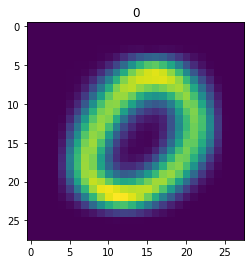

Text(0.5, 1.0, '1')

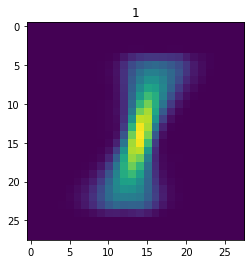

Text(0.5, 1.0, '2')

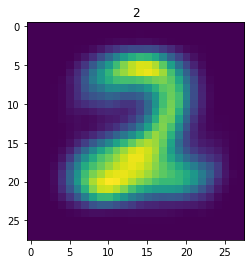

Text(0.5, 1.0, '3')

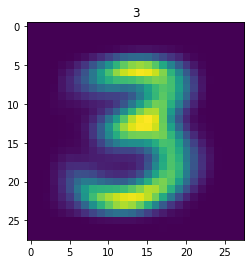

Text(0.5, 1.0, '4')

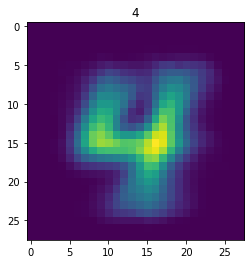

Text(0.5, 1.0, '5')

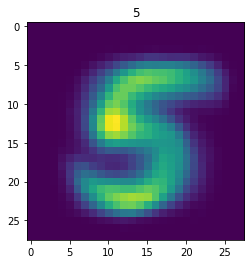

Text(0.5, 1.0, '6')

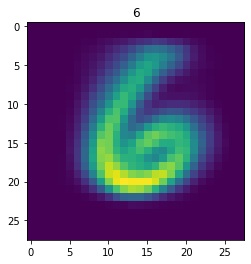

Text(0.5, 1.0, '7')

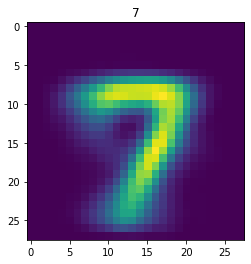

Text(0.5, 1.0, '8')

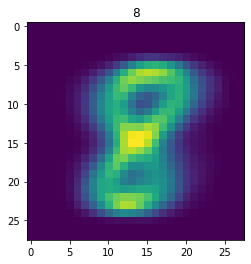

Text(0.5, 1.0, '9')

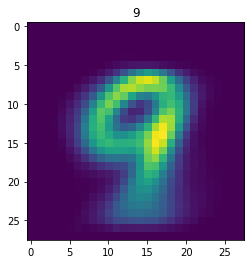

In [87]:

# plot the mean of each class
for c in labels:
    mean = model.gaussians[c]['mean']
    cov = model.gaussians[c]['var']
    plt.imshow(mean.reshape(28, 28))
    plt.title(c)
    plt.show()